# The Iris dataset in scikit-learn

#### Features 
<ul>
<li>Petal length</li>
<li>Petal width</li>
<li>Sepal length</li>
<li>Sepal width </li>
    
</ul>

#### Target Variables: Species
<ul>
<li>Versicolor</li>
<li>Virginica</li>
<li>Setosa</li>
    
</ul>

## Exploratory Data Analysis

In [1]:
from sklearn import datasets

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

In [2]:
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


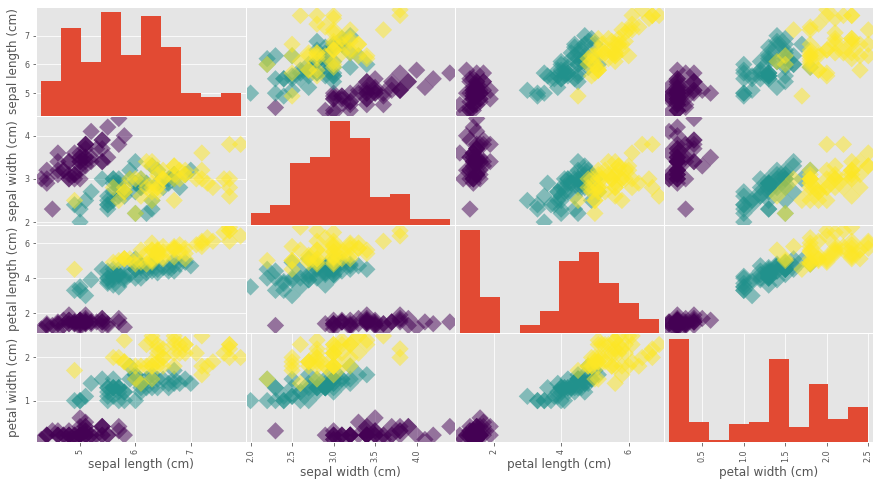

In [9]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [15, 8], s=150, marker = 'D')

## The Classification Challenge

#### Basic idea: Predict the species label of a data point by: 
<ul>
<li>looking at the closest 'k' labeled data points</li>
<li>taking a majority vote</li>    
</ul>

## Using scikit-learn to fit a classifier

importing KNeighbors Classifier from sklearn.neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier


Create a k-NN classifier with 6 neighbors

Fit the classifier to the data

In [11]:
knn = KNeighborsClassifier(n_neighbors = 6) #using 6 closest data points 
knn.fit(iris['data'], iris['target']) #using the target to train and predicting the target assigning to var knn 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [12]:
iris['data'].shape #150 rows by 4 columns

(150, 4)

In [13]:
iris['target'].shape

(150,)

## Predicting on unlabeled data

In [14]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1], 
                [5.7, 2.6, 3.8, 1.3], 
                [4.7, 3.2, 1.3, 0.2]])

In [15]:
prediction = knn.predict(X_new)

In [16]:
X_new.shape

(3, 4)

In [17]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


prediction accurately predicts 1 for versicolor for the first two observations and 0 for setosa in the third observation. 

## Measuring Model Performance

how to measure performance?

in classification problems accuracy is the key metric to gauge performance 

accuracy = n correct predictions / total number of data points 

but what would data to test accuracy on? solution, test accuracy on unseen data from test set

split data into test/train sets

split the data into train and train and test by importing **train_test_split** function from sklearn

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=21, stratify=y)


then use **train_test_split** to randomly split our dataset

first argument is the feature data, 2nd is target/labeled data

**test_size** argument specifies what porportion of the orginal data should be the test set (here we specify 30% of the data for testing) 

this gives us a 70/30 split

**random_state** sets a seed value for the random number generator, setting the same seed will allow us to replicate results 

**train_test_split()** returns 4 arrays 

* training data 
* test data 
* training labels 
* test labels 

these are assign to 4 variables 
* X_train = training data 
* X_test = test data
* y_train = training labels
* y_test = test labels


by default **train_test_split()** splits our data into a 75/25 split


#### Best Practise

split the data so that the split reflects the labels of our data 

this means we want to distribute the labels in our train and test sets **as they are** in the original dataset 

to do this we use the keyword **stratify = y** to declare this in our train_test_split() function where y is the array/list containing these labels 

In [20]:

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
#print(\"Test set predictions:\\n {}\".format(y_pred))

#### Accuracy: 

In [22]:
score = round(knn.score(X_test, y_test)*100, 2)

In [23]:
print("Prediction Acccuracy: ", score, "%")

Prediction Acccuracy:  95.56 %


## Overfitting & Underfitting

here we will create a model complexity curve to gauge the ideal number of neighbors and determine whether we are under/over fitting our model 

We do this by looping our classifier but changing the **n_neighbers** values each time. We will record these values and plot the results

This is where we will run our prediction loop through

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)


Here we will plot the results 


We can see the following: 

Testing Accuracy spikes at k = 3 & k = 6, with a slight dropoff after k = 7 up to k = 9

accuracy drops steep declines k = 2, k= 4, & k = 5


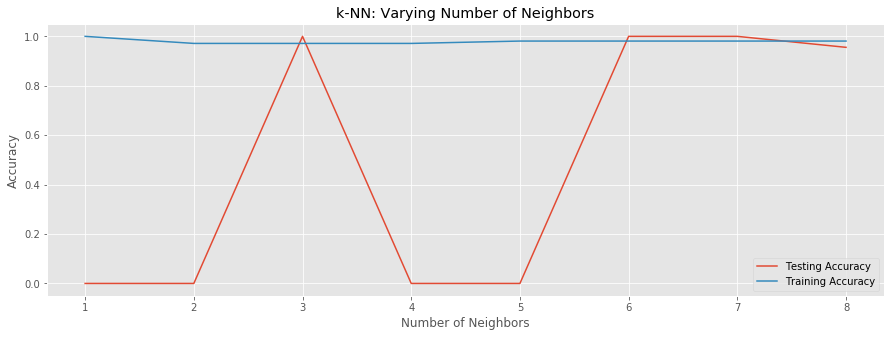

In [25]:
#Compute accuracy on the testing set
test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(15,5)) 
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()